# Keras tutorial - Cats vs Dogs classification

Welcome to Keras tutorial. In this tutorial we will:
1. Learn to use Keras
2. See how you can in a couple of hours build a classification algorithm.

In this tutorial part, we'll work on the Cats vs Dogs classification problem. Let's load the required packages for our tutorial:

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import cv2
import numpy as np

import tensorflow as tf

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
import keras.backend as K
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from IPython.display import SVG

Using TensorFlow backend.


**Note**: As you can see, I imported a lot of functions from Keras. You can use them easily just by calling them directly in the notebook. Ex: `X = Input(...)` or `X = ZeroPadding2D(...)`.


In [2]:
ROWS = 64
COLS = 64
CHANNELS = 3
CLASSES = 2

In [3]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

def prepare_data(images):
    m = len(images)
    X = np.zeros((m, ROWS, COLS, CHANNELS), dtype=np.uint8)
    y = np.zeros((1, m), dtype=np.uint8)
    for i, image_file in enumerate(images):
        X[i,:] = read_image(image_file)
        if 'dog' in image_file.lower():
            y[0, i] = 1
        elif 'cat' in image_file.lower():
            y[0, i] = 0
    return X, y

Run the following code to normalize the dataset and learn about its shapes.

In [4]:
TRAIN_DIR = 'Train_data/'
TEST_DIR = 'Test_data/'

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

train_set_x, train_set_y = prepare_data(train_images)
test_set_x, test_set_y = prepare_data(test_images)

X_train = train_set_x/255
X_test = test_set_x/255

Y_train = train_set_y.T
Y_test = test_set_y.T

In [6]:
print ("number of training examples =", X_train.shape[0])
print ("number of test examples =", X_test.shape[0])
print ("X_train shape:", X_train.shape)
print ("Y_train shape:", Y_train.shape)
print ("X_test shape:", X_test.shape)
print ("Y_test shape:", Y_test.shape)

number of training examples = 6002
number of test examples = 1000
X_train shape: (6002, 64, 64, 3)
Y_train shape: (6002, 1)
X_test shape: (1000, 64, 64, 3)
Y_test shape: (1000, 1)


## 2 - Building a model in Keras

Keras is very good for rapid prototyping. In just a short time we will be able to build a model that achieves outstanding results.

Here is an example of a model in Keras:

```python
def model(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model
```

**Note**: Be careful with your data-set shape. Use what you've learned in previous tutorials to make sure your convolutional, pooling and fully-connected layers are adapted to the volumes you're applying it to.

**Arguments**:<br>
    input_shape - shape of the images of the dataset<br>

**Returns**:<br>
    model - a Model() instance in Keras<br>

In [37]:
def OurModel(input_shape):
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='OurModel')    
    
    return model

We have now built a function to describe your model. To train and test this model, there are four steps in Keras:
First is to create the model by calling the function above.



In [38]:
OurModel = OurModel(input_shape=(ROWS, COLS, CHANNELS))

Now we will implement step 2, i.e. compile the model to configure the learning process. Choose the 3 arguments of `compile()` wisely:

In [39]:
OurModel.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

Now we will implement step 3, i.e. train the model. Choose the number of epochs and the batch size:

In [40]:
OurModel.fit(x=X_train, y=Y_train, batch_size=200, epochs=20)

Epoch 1/20
6002/6002 [==============================] - 3s 440us/step - loss: 1.7060 - acc: 0.5377
Epoch 2/20
6002/6002 [==============================] - 2s 250us/step - loss: 0.6642 - acc: 0.6566
Epoch 3/20
6002/6002 [==============================] - 2s 282us/step - loss: 0.6024 - acc: 0.6889
Epoch 4/20
6002/6002 [==============================] - 2s 265us/step - loss: 1.0007 - acc: 0.6021
Epoch 5/20
6002/6002 [==============================] - 2s 261us/step - loss: 0.9938 - acc: 0.6180
Epoch 6/20
6002/6002 [==============================] - 2s 259us/step - loss: 0.8620 - acc: 0.6438
Epoch 7/20
6002/6002 [==============================] - 2s 251us/step - loss: 0.6726 - acc: 0.6789
Epoch 8/20
6002/6002 [==============================] - 1s 249us/step - loss: 0.5702 - acc: 0.7144 0s - loss: 0.6011
Epoch 9/20
6002/6002 [==============================] - 2s 256us/step - loss: 0.6179 - acc: 0.7046
Epoch 10/20
6002/6002 [==============================] - 2s 273us/step - loss: 0.6312 - acc

Now we will implement step 4, i.e. test/evaluate the model.

In [41]:
preds = OurModel.evaluate(x=X_test, y=Y_test, batch_size=150)

print()
print ("Loss = ", preds[0])
print ("Test Accuracy = ", preds[1])

1000/1000 [==============================] - 0s 392us/step

Loss =  1.484282861277461
Test Accuracy =  0.5659999966621398


## 3 - Test with your own image (Optional)

You can now take a picture of your cat or dog and see what our model predicts House. To do that:

In [44]:
#test_image = "cat.jpg"
test_image = "dog.jpg"
my_image = read_image(test_image).reshape(1, ROWS, COLS, CHANNELS)
my_image = my_image / 255.

In [45]:
print(OurModel.predict(my_image))

[[0.99919766]]


## 4 - Other useful functions in Keras

Two other basic features of Keras that you'll find useful are:
- `model.summary()`: prints the details of your layers in a table with the sizes of its inputs/outputs
- `plot_model()`: plots your graph in a nice layout. You can even save it as ".png" using SVG() if you'd like to share it on social media ;).

Run the following code:

In [46]:
OurModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_6 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 32768)             0         
__________

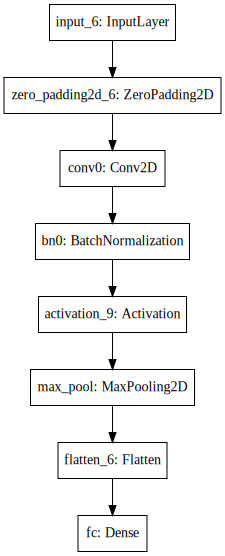

In [47]:
plot_model(OurModel, to_file='OurModel.png')
SVG(model_to_dot(OurModel).create(prog='dot', format='svg'))

## 5 - Conclusion

Congratulations, you have solved the Cats vs Dogs classification challenge! 